# import modules and libraries #

In [4]:
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.patches import Patch
import pandas as pd
import numpy as np
import seaborn as sns 


In [5]:
X, y = make_blobs(n_samples=150, n_features=2, centers=3, random_state=1000)

In [6]:
df = pd.DataFrame(X, y)
df

,0,1
2,7.113061,-5.008640
2,6.275118,-5.995788
0,0.390199,-8.868673
1,7.611089,-0.569420
0,1.875722,-8.105821
...,...,...
1,11.284697,0.615979
0,3.321790,-7.048699
2,7.177680,-6.851554
1,7.706095,-1.221194


In [7]:
X.shape 

(150, 2)

In [8]:
y

array([2, 2, 0, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 2, 2, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2,
       1, 1, 2, 1, 2, 2, 0, 2, 0, 1, 0, 2, 2, 0, 2, 0, 1, 2, 1, 0, 2, 2,
       0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 2, 0, 2, 0, 1, 2,
       2, 0, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2, 2,
       0, 1, 2, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 0, 2, 0, 1, 0, 2, 1, 2])

In [9]:
KMean_model = KMeans(n_clusters=3, random_state=1000)

In [10]:
KMean_model.fit(X)

KMeans(n_clusters=3, random_state=1000)

In [11]:
labels = KMean_model.labels_
labels

array([1, 1, 2, 0, 2, 1, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 1, 1, 1, 2, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 2, 1, 1,
       0, 0, 1, 0, 1, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 2, 0, 1, 0, 2, 1, 1,
       2, 1, 2, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 2, 2, 1, 2, 1, 1, 0, 1,
       1, 2, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 1,
       2, 0, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 2, 0, 2, 1, 0, 1], dtype=int32)

In [12]:
silhouette_score(X, labels)

np.float64(0.6344840928394464)

In [13]:
KMean_model.inertia_

305.61514300878616

In [14]:
wcss = []

for K in range(1, 11):
    model = KMeans(n_clusters=K, random_state=1000)
    model.fit(X)
    wcss.append(model.inertia_)

print(wcss)

[2584.167159130466, 866.0660241889427, 305.61514300878616, 266.1673953381082, 219.1056920445661, 185.00481621912826, 166.12295661652988, 142.5250763334804, 124.03803964104455, 115.81000862268506]


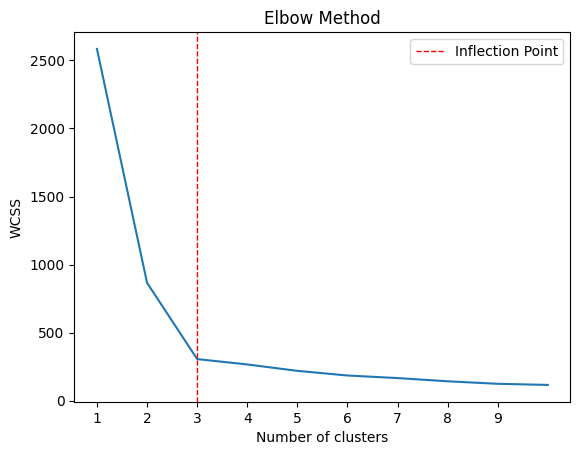

In [15]:
plt.plot(range(1,11), wcss)

plt.xticks(range(1, 10))
plt.axvline(x=3, color='r', linestyle='--', linewidth=1, label='Inflection Point')

plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.legend()

plt.show()

In [16]:
clusters = KMean_model.cluster_centers_
clusters

array([[ 8.82285588, -0.5634904 ],
       [ 7.35643128, -6.0467075 ],
       [ 2.8469415 , -7.51987316]])

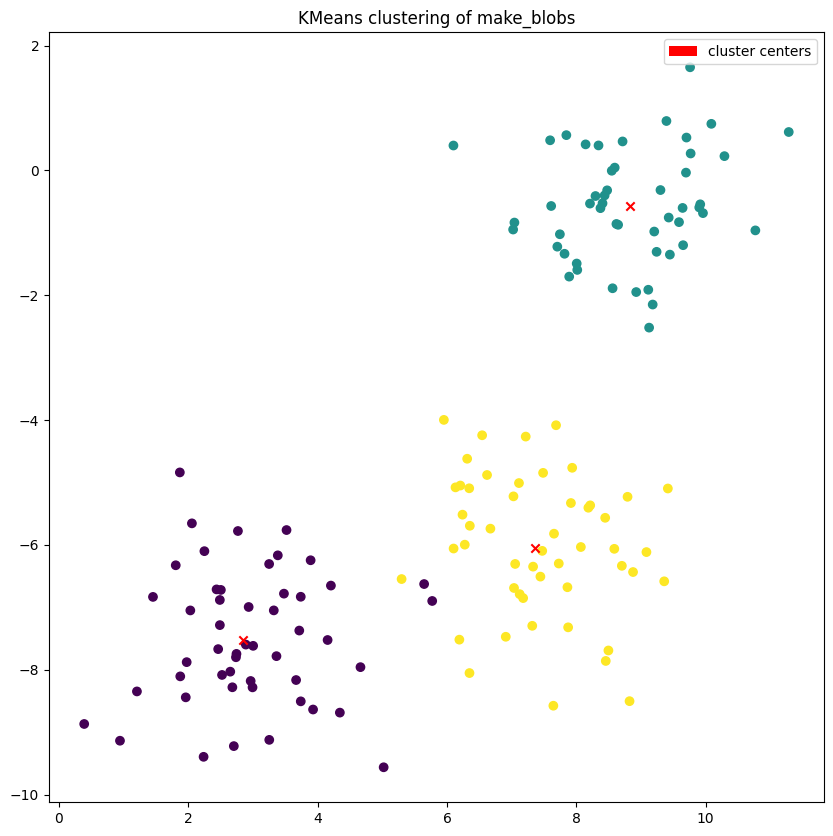

In [17]:
plt.figure(figsize=(10, 10))

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(clusters[:, 0], clusters[:, 1], c='red', marker='x')

legend_elements = [Patch(facecolor='red', label='cluster centers')
]

#plt.colorbar(label='Clusters')

plt.title('KMeans clustering of make_blobs')

plt.legend(handles=legend_elements)

plt.show()

In [18]:

KMeans()

'''KMeans(
    n_clusters=8,
    *,
    init='k-means++',
    n_init='auto',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd'
    '''


p_grid = {'init': ['k-means++', 'random'],
          'max_iter': np.arange(100, 1000, 100),
          'n_init': np.arange(1, 11),
          'algorithm': ['lloyd', 'elkan']
}

KMeans_grid_model = GridSearchCV(estimator=KMean_model, param_grid=p_grid, cv=5)
KMeans_grid_model

GridSearchCV(cv=5, estimator=KMeans(n_clusters=3, random_state=1000),
             param_grid={'algorithm': ['lloyd', 'elkan'],
                         'init': ['k-means++', 'random'],
                         'max_iter': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                         'n_init': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [19]:
 KMeans_grid_model.fit(X)

GridSearchCV(cv=5, estimator=KMeans(n_clusters=3, random_state=1000),
             param_grid={'algorithm': ['lloyd', 'elkan'],
                         'init': ['k-means++', 'random'],
                         'max_iter': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                         'n_init': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [20]:
pd.DataFrame(KMeans_grid_model.cv_results_).iloc[:, 4:].sort_values('rank_test_score', ascending=True)

,param_algorithm,param_init,param_max_iter,param_n_init,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,lloyd,k-means++,100,1,"{'algorithm': 'lloyd', 'init': 'k-means++', 'm...",-62.425624,-70.563871,-59.221941,-63.567287,-60.724715,-63.300687,3.920777,1
244,elkan,k-means++,700,5,"{'algorithm': 'elkan', 'init': 'k-means++', 'm...",-62.425624,-70.563871,-59.221941,-63.567287,-60.724715,-63.300687,3.920777,1
243,elkan,k-means++,700,4,"{'algorithm': 'elkan', 'init': 'k-means++', 'm...",-62.425624,-70.563871,-59.221941,-63.567287,-60.724715,-63.300687,3.920777,1
242,elkan,k-means++,700,3,"{'algorithm': 'elkan', 'init': 'k-means++', 'm...",-62.425624,-70.563871,-59.221941,-63.567287,-60.724715,-63.300687,3.920777,1
241,elkan,k-means++,700,2,"{'algorithm': 'elkan', 'init': 'k-means++', 'm...",-62.425624,-70.563871,-59.221941,-63.567287,-60.724715,-63.300687,3.920777,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,lloyd,random,300,7,"{'algorithm': 'lloyd', 'init': 'random', 'max_...",-62.425624,-70.563871,-59.221941,-63.567287,-60.724715,-63.300687,3.920777,1
115,lloyd,random,300,6,"{'algorithm': 'lloyd', 'init': 'random', 'max_...",-62.425624,-70.563871,-59.221941,-63.567287,-60.724715,-63.300687,3.920777,1
114,lloyd,random,300,5,"{'algorithm': 'lloyd', 'init': 'random', 'max_...",-62.425624,-70.563871,-59.221941,-63.567287,-60.724715,-63.300687,3.920777,1
112,lloyd,random,300,3,"{'algorithm': 'lloyd', 'init': 'random', 'max_...",-62.425624,-70.563871,-59.221941,-63.567287,-60.724715,-63.300687,3.920777,1


# Agglomerative clustering #

In [26]:
AC_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

In [30]:
AC_model.fit(X)

AgglomerativeClustering(n_clusters=3)

In [32]:
AC_predictions = AC_model.labels_

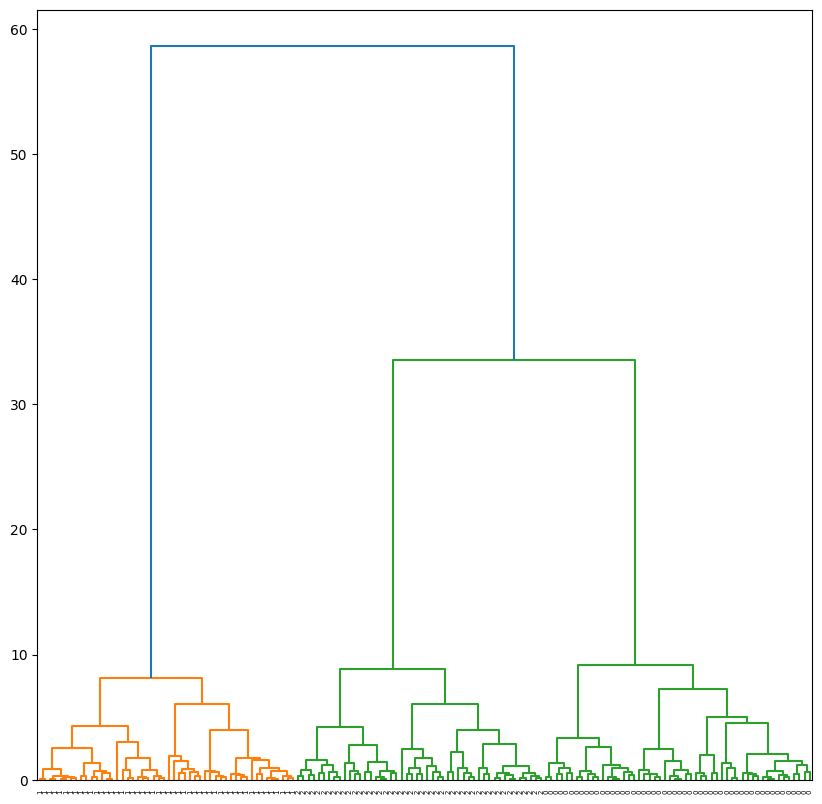

In [39]:
Z = linkage(X, 'ward')


#plt.scatter(X[:, 0], X[:, 1], c=y)


plt.figure(figsize=(10, 10))
dendrogram(Z, orientation='top', labels=AC_predictions, show_leaf_counts=True)
plt.show()
